# Ejercicio 2
Contenido del dataset: Resumen: Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) de temperatura, humedad, luz y CO2. La ocupación real se obtuvo a partir de imágenes con marca de tiempo que se tomaron cada minuto.
El ejercicio consiste obtener un modelo de clasificación para clasificar en si está ocupada (clase positiva) o no lo está, usando SVM y optimizando con  rejilla (GridSearchCV) los hiperparámetros C y kernel.
El dataset está en formato de texto, pero se puede cargar como archivo csv, y contiene un conjunto de entrenamiento (datatraining.txt) dos conjuntos de test (datatest.txt y datatest2.txt) aunque vamos a usar solo el primero (datatest.txt). Contiene 6 atributos y la clase. Como el primero es la fecha y hora habría que eliminarlo. Los atributos son: fecha, temperatura, humedad, iluminación, CO2, ratio de humedad y etiqueta/clase
*   URL: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

**Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC)** implementar un clasificador basado en el SVM No lineal (SVC)  que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento para escalar los datos.
*   Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
*   Entrenar el modelo y mostrar los mejores parámetros.
*   Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [22]:
import pandas as pd

In [23]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
unzip occupancy_data.zip -d content

--2025-01-15 00:27:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘occupancy_data.zip’

     0K .......... .......... .......... .......... .......... 84,4K
    50K .......... .......... .......... .......... ..........  273K
   100K .......... .......... .......... .......... ..........  278K
   150K .......... .......... .......... .......... .......... 55,6M
   200K .......... .......... .......... .......... ..........  272K
   250K .......... .......... .......... .......... .......... 67,9M
   300K .......... .......... .......                          50,7M=1,1s

2025-01-15 00:27:20 (287 KB/s) - ‘occupancy_data.zip’ saved [335713]



Archive:  occupancy_data.zip
  inflating: content/datatest.txt    
  inflating: content/datatest2.txt   
  inflating: content/datatraining.txt  


In [24]:
occupancy_train = pd.read_csv("content/datatraining.txt")

In [25]:
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [26]:
occupancy_test = pd.read_csv("content/datatest.txt")

In [27]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [28]:
#Como nos suministran los datos separados en test y entrenamiento, no hay que hacer partición del dataset en test y entrenamiento, como en el ejercicio 1
#Ahora habría la fecha de los conjuntos test y entrenamiento.
#Después habría que separar en los conjuntos de entrenamiento y test, los datos de las etiquetas/clases
#Para estas dos acciones, ver el código suministrado del ejercicio 1.
#Así se obtendrán los conjuntos X_train, X_test, y_train, y_test

In [29]:
#Una vez obtenidos los conjuntos de test y de entrenamiento, hay que aplicar el escalado con StandarScaler (no vamos a usar pipe).
#Para aplicarlo por ejemplo en X_train --> X_train = StandardScaler().fit_transform(X_train)

# Tarea

In [30]:
import numpy as np

# Para la parte de preprocesamiento y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Para gráficos
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [31]:
# Para entrenamiento
X_train = occupancy_train.drop(['date', 'Occupancy'], axis=1)
y_train = occupancy_train['Occupancy']

# Para test
X_test = occupancy_test.drop(['date', 'Occupancy'], axis=1)
y_test = occupancy_test['Occupancy']

print("Columnas en X_train:", X_train.columns.tolist())
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Columnas en X_train: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
Tamaño de X_train: (8143, 5)
Tamaño de y_train: (8143,)
Tamaño de X_test: (2665, 5)
Tamaño de y_test: (2665,)


In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vemos la forma final de X_train_scaled y X_test_scaled
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (8143, 5)
X_test_scaled shape: (2665, 5)


Mejores parámetros para SVC: {'C': 2, 'kernel': 'linear'}
Matriz de confusión (SVC):
 [[1639   54]
 [   3  969]]


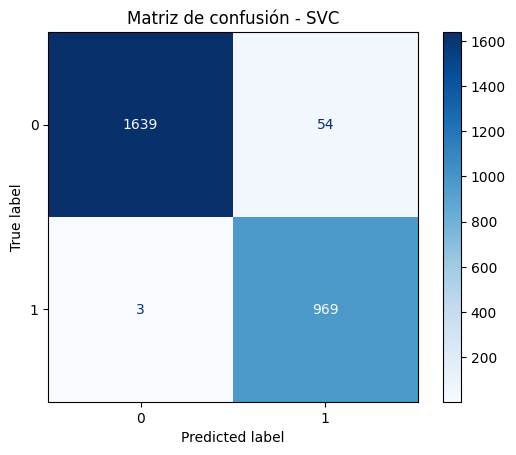

Accuracy (SVC): 0.9786116322701689
Precisión (SVC): 0.9472140762463344
Recall (SVC): 0.9969135802469136
F1 (SVC): 0.9714285714285714

Reporte de clasificación (SVC):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [33]:
# Definición de la rejilla de parámetros para SVC (SVM)
param_grid_svc = {
    'C': [0.01, 0.1, 1, 2],
    'kernel': ["linear", "poly", "rbf", "sigmoid"]
}

# Creación del estimador
svc = SVC()

# Definición de GridSearchCV con validación cruzada
grid_svc = GridSearchCV(
    estimator=svc, 
    param_grid=param_grid_svc,
    cv=5,              # número de folds para la validación cruzada
    scoring='accuracy',
    n_jobs=-1          # usa todos los procesadores disponibles
)

# Entrenamiento (ajuste) del modelo con la rejilla
grid_svc.fit(X_train_scaled, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros para SVC:", grid_svc.best_params_)
# Obtenemos el mejor modelo encontrado por la rejilla
best_svc = grid_svc.best_estimator_

# Predecimos sobre el conjunto de test
y_pred_svc = best_svc.predict(X_test_scaled)

# Mostramos la matriz de confusión en texto
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Matriz de confusión (SVC):\n", cm_svc)

# Graficamos la matriz de confusión
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=[0, 1])
disp_svc.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - SVC")
plt.show()

# Reporte de métricas
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print("Accuracy (SVC):", accuracy_svc)
print("Precisión (SVC):", precision_svc)
print("Recall (SVC):", recall_svc)
print("F1 (SVC):", f1_svc)

# También se puede imprimir un reporte de clasificación
print("\nReporte de clasificación (SVC):\n", classification_report(y_test, y_pred_svc))

Mejores parámetros para el árbol de decisión: {'max_leaf_nodes': 3, 'min_samples_split': 2}
Matriz de confusión (Árbol de Decisión):
 [[1640   53]
 [   5  967]]


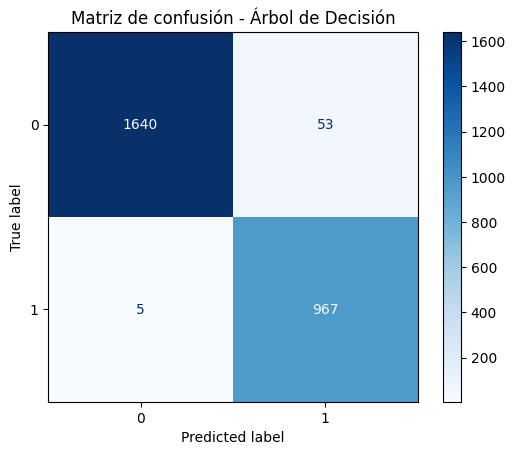

Accuracy (Árbol de Decisión): 0.9782363977485928
Precisión (Árbol de Decisión): 0.9480392156862745
Recall (Árbol de Decisión): 0.9948559670781894
F1 (Árbol de Decisión): 0.9708835341365462

Reporte de clasificación (Árbol de Decisión):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      0.99      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



In [34]:
# Definimos la rejilla de parámetros para el árbol de decisión.
param_grid_dt = {
    'max_leaf_nodes': list(range(3, 30)),
    'min_samples_split': [2, 3, 4, 5, 6]
}

# Creamos el estimador
dt = DecisionTreeClassifier(random_state=42)

# Definimos el GridSearchCV
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Entrenamos el modelo con la rejilla
grid_dt.fit(X_train_scaled, y_train)

# Mostramos los mejores parámetros
print("Mejores parámetros para el árbol de decisión:", grid_dt.best_params_)
# Obtenemos el mejor modelo de árbol de decisión
best_dt = grid_dt.best_estimator_

# Realizamos las predicciones sobre el conjunto de test
y_pred_dt = best_dt.predict(X_test_scaled)

# Mostramos la matriz de confusión en texto
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Matriz de confusión (Árbol de Decisión):\n", cm_dt)

# Graficamos la matriz de confusión
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0, 1])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Árbol de Decisión")
plt.show()

# Reporte de métricas
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Accuracy (Árbol de Decisión):", accuracy_dt)
print("Precisión (Árbol de Decisión):", precision_dt)
print("Recall (Árbol de Decisión):", recall_dt)
print("F1 (Árbol de Decisión):", f1_dt)

# También podemos imprimir un reporte de clasificación
print("\nReporte de clasificación (Árbol de Decisión):\n", classification_report(y_test, y_pred_dt))

In [35]:
%%bash
rm -r content/ occupancy_data.zip

## Resumen de pasos y resultados

**Pasos realizados:**
1. Se cargaron los datos de entrenamiento (`datatraining.txt`) y de test (`datatest.txt`).
2. Se eliminaron las columnas no relevantes para la clasificación (en este caso, la columna `date`).
3. Se separaron las características (`X`) de la etiqueta/clase (`y`).
4. Se aplicó un escalado de datos usando `StandardScaler` en los atributos de entrenamiento y test.
5. Se definió una rejilla de parámetros para un clasificador `SVC` (máquina de soporte vectorial) con los valores:
   - `C`: [0.01, 0.1, 1, 2]
   - `kernel`: ["linear", "poly", "rbf", "sigmoid"]
6. Se entrenó el `GridSearchCV` para encontrar la mejor combinación de parámetros, se obtuvo el mejor estimador y se evaluó en el conjunto de test. Se mostraron:
   - Matriz de confusión (en texto y gráfica)
   - Métricas de _accuracy_, _precisión_, _recall_ y _f1_.
7. Se implementó un clasificador de árbol de decisión con la rejilla de parámetros:
   - `max_leaf_nodes`: [3..29]
   - `min_samples_split`: [2, 3, 4, 5, 6]
8. Se entrenó el modelo y se obtuvo la mejor combinación de parámetros. También se mostraron:
   - Matriz de confusión (en texto y gráfica)
   - Métricas de _accuracy_, _precisión_, _recall_ y _f1_.